In [5]:
from week1 import infocontent, entropy


In [4]:
infocontent(1/12)

3.584962500721156

In [6]:
entropy([5/6, 1/6])

0.6500224216483541

In [7]:
entropy([7/12, 5/12])

0.9798687566511528

In [14]:
import numpy as np
p=np.array([[1/2, 1/12],[1/3, 1/12]])

In [26]:
from week1 import marginalX, marginalY, jointEntropyEmpirical, jointEntropy

In [17]:
X=marginalX(p)
Y=marginalY(p)

In [27]:
Hxy = jointEntropy(p)

In [28]:
Hxy


1.6258145836939115

In [22]:
p

array([[0.5       , 0.08333333],
       [0.33333333, 0.08333333]])

In [23]:
1/12

0.08333333333333333

In [24]:
-0.5*np.log2(0.5)-(1/3)*np.log2(1/3)-2*(1/12)*np.log2(1/12)

1.6258145836939115

In [29]:
-np.log2(1/3)

1.5849625007211563

In [31]:
1.5850 -1.2630

0.32200000000000006

In [32]:
0.2630 + 1.2630 -1.5850

-0.05900000000000016

In [33]:
1.2630 - 1.322

-0.05900000000000016

In [34]:
0.2630 - 0.322

-0.059

In [35]:
0.65 + 0.9799 - 1.6258

0.004100000000000215

# Question 2

In [36]:
-np.log2(1/24)

4.584962500721156

In [37]:
-np.log2(1/8)

3.0

In [38]:
entropy([5/24, 19/24])

0.7382848661434506

In [39]:
-(5/24)*np.log2(5/24)-(19/24)*np.log2(19/24)

0.7382848661434506

In [40]:
-(1/12)*np.log2(1/12) - 2*(1/8)*np.log2(1/8) - (2/3)*np.log2(2/3)

1.438721875540867

In [41]:
p=[ [1/12, 1/8 ],                  [1/8, 2/3 ] ]


In [42]:
jointEntropy(p)

1.438721875540867

In [43]:
0.7383*2 - 1.4387

0.03789999999999982

In [44]:
from week1 import mutualInformation

In [45]:
mutualInformation(p)

0.03784785674603386

In [46]:
entropy([5/24, 19/24])

0.7382848661434506

In [47]:
entropy([5/24, 19/24])*2 - jointEntropy(p)

0.03784785674603408

In [48]:
-(2/3)*np.log2(2/3) - (1/3)*np.log2(1/3)

0.9182958340544896

Question 4.

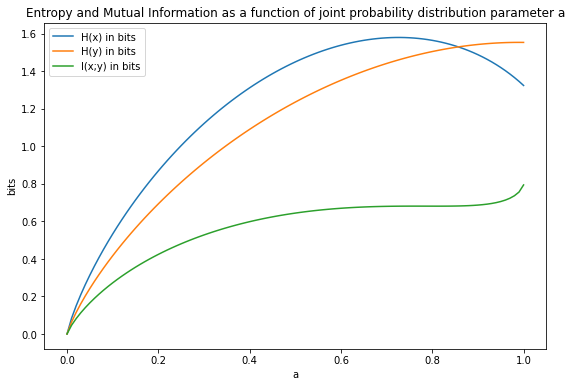

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from week1 import entropy, mutualInformation, marginalX, marginalY, jointEntropy

def getJointProbabilities(a):
    # !! X = in rows
    #    Y = in columns
    # !! using the transpose of the exercise matrix:
    #  1-a , 0, a/12
    #  a/3, a/12, 0
    #  0,   a/3, a/6
    return np.array([[1-a, 0, a/12],[a/3, a/12, 0],[0, a/3, a/6]])

As = np.linspace(0, 1, num=101)

ps = [ getJointProbabilities(a) for a in As ]

Hxs = [entropy(marginalX(p)) for p in ps]
Hys = [entropy(marginalY(p)) for p in ps]
Ixys = [mutualInformation(p)  for p in ps]
Hxys = [jointEntropy(p) for p in ps]

fig, axs = plt.subplots(1, 1, figsize=(9, 6))  
axs.plot(As, Hxs, label='H(x) in bits')
axs.plot(As, Hys, label='H(y) in bits')
axs.plot(As, Ixys, label='I(x;y) in bits')
#axs.plot(As, Hxys, label='H(x,y) in bits')
#axs.plot(As, list(np.array(Hxs) + np.array(Hys)), label='H(x) + H(y) in bits')
#axs.plot(As, list(np.array(Hxs) + np.array(Hys) - np.array(Hxys)), label='H(x) + H(y) - H(x,y) in bits')
axs.set_title('Entropy and Mutual Information as a function of joint probability distribution parameter a')
axs.set_xlabel('a')
axs.set_ylabel('bits')
plt.legend()
plt.show()

In [65]:
[marginalY(p) for p in ps[slice(0, None, 10)]]

[array([1., 0., 0.]),
 array([0.90833333, 0.04166667, 0.05      ]),
 array([0.81666667, 0.08333333, 0.1       ]),
 array([0.725, 0.125, 0.15 ]),
 array([0.63333333, 0.16666667, 0.2       ]),
 array([0.54166667, 0.20833333, 0.25      ]),
 array([0.45, 0.25, 0.3 ]),
 array([0.35833333, 0.29166667, 0.35      ]),
 array([0.26666667, 0.33333333, 0.4       ]),
 array([0.175, 0.375, 0.45 ]),
 array([0.08333333, 0.41666667, 0.5       ])]

In [69]:
[marginalX(p) for p in ps[slice(0, None, 10)]]

[array([1., 0., 0.]),
 array([0.93333333, 0.04166667, 0.025     ]),
 array([0.86666667, 0.08333333, 0.05      ]),
 array([0.8  , 0.125, 0.075]),
 array([0.73333333, 0.16666667, 0.1       ]),
 array([0.66666667, 0.20833333, 0.125     ]),
 array([0.6 , 0.25, 0.15]),
 array([0.53333333, 0.29166667, 0.175     ]),
 array([0.46666667, 0.33333333, 0.2       ]),
 array([0.4  , 0.375, 0.225]),
 array([0.33333333, 0.41666667, 0.25      ])]

# Question 5.

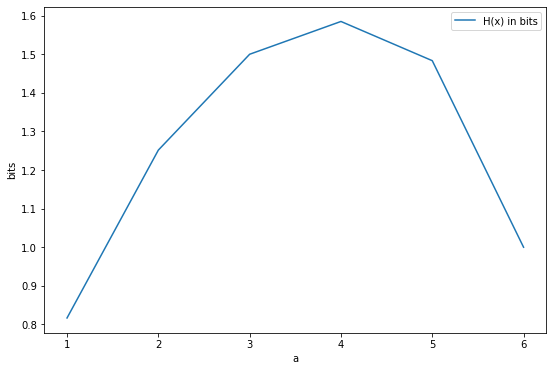

In [76]:
# a : number of coins on one side of the scale (==> total coins on the scale = 2*a)
# b : number of coins on the side (i.e. not on the scale)
# 2*a + b = 12, total number of coins

As = [1,2,3,4,5,6]

def getP(a):
    b = 12 - (2 * a)
    return [a/12, a/12, b/12]

ps = [ getP(a) for a in As ]

Hxs = [entropy(p) for p in ps]

fig, axs = plt.subplots(1, 1, figsize=(9, 6))  
axs.plot(As, Hxs, label='H(x) in bits')

axs.set_xlabel('a')
axs.set_ylabel('bits')
plt.legend()
plt.show()   